In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [2]:
# Load the Xception model
# https://keras.io/api/applications/xception/
model = Xception(
    include_top=True,
    weights='imagenet')

In [3]:
# Default Image Size for Xception
image_size = (299, 299)

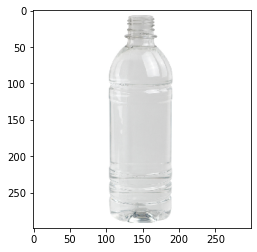

In [4]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join("Resources", "bottle.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [5]:
# Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n04557648', 'water_bottle', 0.9216042), ('n04560804', 'water_jug', 0.009351157), ('n03062245', 'cocktail_shaker', 0.007588938)]


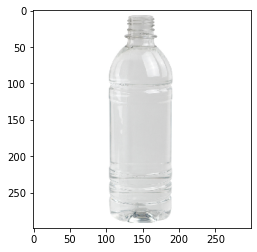

In [6]:
# Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [ ]:
# # Refactor above steps into reusable function
# def predict(image_path):
#     """Use Xception to label image"""
#     img = image.load_img(image_path, target_size=image_size)
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     predictions = model.predict(x)
#     plt.imshow(img)
#     print('Predicted:', decode_predictions(predictions, top=3)[0])

In [ ]:
# image_path = os.path.join("..", "Images", "kitten.jpg")
# predict(image_path)